# Introduction to Simple-playgrounds

Welcome to Simple-playgrounds, a library that allows you to easily build environments for AI.

First of all, we are going to create an empty playground and add a Scene Element in it.
In order to run the playground, and display its contents, we are using a game engine.

pygame 2.0.0 (SDL 2.0.12, python 3.8.5)
Hello from the pygame community. https://www.pygame.org/contribute.html


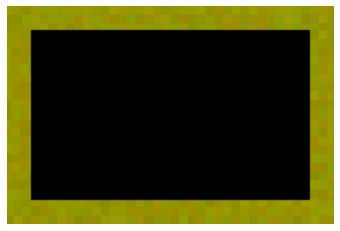

In [1]:
from simple_playgrounds.playgrounds import SingleRoom
from simple_playgrounds import Engine

%matplotlib inline
import matplotlib.pyplot as plt

def plt_image(img):
    plt.axis('off')
    plt.imshow(img)
    plt.show()
    
my_playground = SingleRoom(size=(150, 100))

# we use the option screen=True to use a keyboard controlled agent later on.
engine = Engine(time_limit=10000, playground= my_playground, screen=False)

topdown_img = engine.generate_playground_image(plt_mode=True)
plt_image(topdown_img)

## Adding a scene element to the playground

Now that we have an empty playground, we can add Scene Elements to it.
Let's start simple, with a fixed circular object at coordinate (30, 30). Note that you always have to specify the orientation of the object, and here it will be 0.

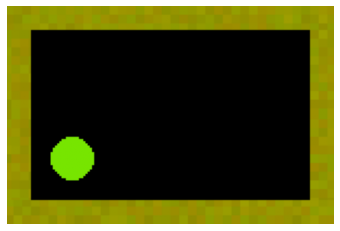

In [2]:
from simple_playgrounds.playgrounds.scene_elements import Basic

circular_object = Basic((30, 30, 0), physical_shape='circle', radius=10, texture = [120, 230, 0])
my_playground.add_scene_element(circular_object)

topdown_img = engine.generate_playground_image(plt_mode=True)
plt_image(topdown_img)

## Using already existing configurations

We can use already existing configurations for basic objects.
Every parameter that we add as a keyword argument will overwrite the default parameter.

As an exampe, we will make a new element which is movable.
Note that movable objets require that you set a mass (duh).

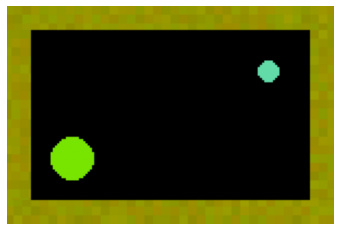

In [3]:
other_circular_object = Basic((120, 70, 0), default_config_key='circle', radius=5, mass=10, movable=True)
my_playground.add_scene_element(other_circular_object)

plt_image(engine.generate_playground_image(plt_mode=True))

## Adding an agent and moving around

Finally, we can add an agent controlled by a keyboard.
This requires the creation of a pygame screen, and will work only on your local machine.
If no initial position is set for the agent, it will appear in the center of the playground by default.

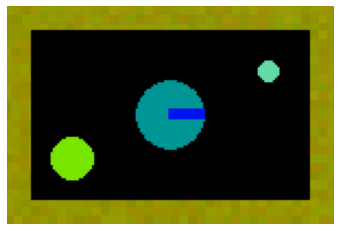

In [5]:
from simple_playgrounds.agents.controllers import Keyboard
from simple_playgrounds.agents.agents import BaseAgent
from simple_playgrounds.agents.parts.platform import ForwardPlatform

my_agent = BaseAgent(controller=Keyboard(), platform=ForwardPlatform)
my_playground.add_agent(my_agent)

plt_image(engine.generate_playground_image(plt_mode=True))

## Runing the simulation

Now that our playground is complete, we can run the simulation until termination of the game.
Alternatively, once you are bored, you can terminte the game by pressing q.


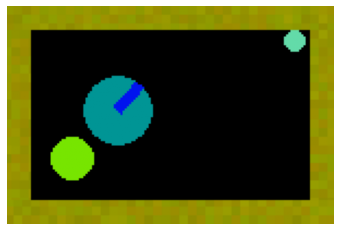

In [6]:
engine = Engine(time_limit=10000, playground= my_playground, screen=True)
engine.run(update_screen = True)
plt_image(engine.generate_playground_image(plt_mode=True))
engine.terminate()